In [134]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

In [135]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X.shape, y.shape

((569, 30), (569,))

In [136]:
np.random.seed(6)
index = random.randint(0, X.shape[0])
X_test = X.loc[index]
y_test = y.loc[index]

In [137]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [138]:
X = X.loc[[41, 44, 73, 81, 89, 91, 135, 146, 484, 481]]
y = y.loc[[41, 44, 73, 81, 89, 91, 135, 146, 484, 481]]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.4023,0.14240,0.2964,0.09606
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,...,16.23,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.3542,0.2779,0.13830,0.2589,0.10300
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.1536,0.4791,0.4858,0.17080,0.3527,0.10160
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.13970,0.3151,0.08473
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.2846,0.14760,0.2556,0.06828
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,14.49,33.37,92.04,653.6,0.1419,0.1523,0.2177,0.09331,0.2829,0.08067
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.18650,0.5774,0.10300
484,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,17.01,14.20,112.50,854.3,0.1541,0.2979,0.4004,0.14520,0.2557,0.08181
481,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.1064,0.1415,0.1673,0.08150,0.2356,0.07603


In [139]:
y

41     0
44     0
73     0
81     1
89     1
91     0
135    0
146    0
484    1
481    1
Name: target, dtype: int64

In [140]:
n_objects = X.shape[0]
w = np.ones(n_objects) / n_objects
w

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [142]:
model_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_1.fit(X, y, sample_weight = w)
pred = model_1.predict(X)

In [143]:
pred == y

41      True
44      True
73     False
81     False
89      True
91      True
135     True
146     True
484     True
481    False
Name: target, dtype: bool

In [146]:
error_1 = - (y_test * np.log(y) + (1 - y_test) * np.log(1 - y))
error_1

41     NaN
44     NaN
73     NaN
81     inf
89     inf
91     NaN
135    NaN
146    NaN
484    inf
481    inf
Name: target, dtype: float64

In [147]:
def amount_of_say(x):
    return 1/2 * np.log((1 - x) / x)

<ipython-input-147-d4f702aa4b94>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/2 * np.log((1 - x) / x)
<ipython-input-147-d4f702aa4b94>:2: RuntimeWarning: divide by zero encountered in log
  return 1/2 * np.log((1 - x) / x)


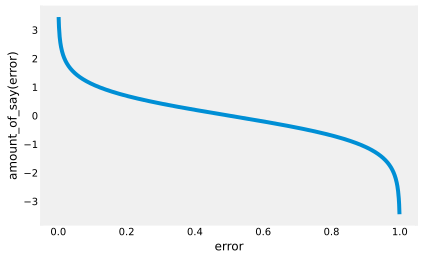

In [148]:
dots = np.linspace(0, 1, 1000)
amount_of_say_value = list(map(amount_of_say, dots))
plt.xlabel('error')
plt.ylabel('amount_of_say(error)')
plt.grid()
plt.plot(dots, amount_of_say_value)

In [149]:
alpha_1 = 1/2 * np.log((1 - error_1) / error_1)
alpha_1

41    NaN
44    NaN
73    NaN
81    NaN
89    NaN
91    NaN
135   NaN
146   NaN
484   NaN
481   NaN
Name: target, dtype: float64

In [150]:
def new_sample_weight(x):
    return np.exp(x)

In [151]:
0.1 * np.exp(3.5)

3.3115451958692312

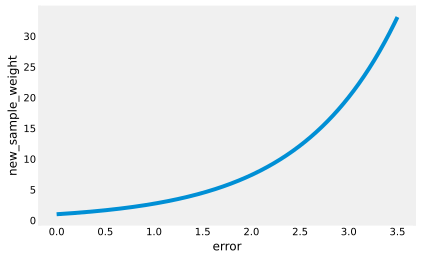

In [152]:
dots = np.linspace(0, 3.5, 1000)
new_sample_weight_value = list(map(new_sample_weight, dots))
plt.xlabel('error')
plt.ylabel('new_sample_weight')
plt.grid()
plt.plot(dots, new_sample_weight_value)

In [153]:
wrong_mask = pred != y
w[wrong_mask] = w[wrong_mask] * np.exp(alpha_1)
w

ValueError: operands could not be broadcast together with shapes (3,) (10,) 